In [1]:
from pythtb import TBModel, Lattice
import matplotlib.pyplot as plt

----------------------------------------
       Tight-binding model report       
----------------------------------------
r-space dimension           = 2
k-space dimension           = 1
periodic directions         = [0]
spinful                     = False
number of spin components   = 1
number of electronic states = 2
number of orbitals          = 2

Lattice vectors (Cartesian):
  # 0 ===> [ 2.000,  0.000]
  # 1 ===> [ 0.000,  1.000]
Volume of unit cell (Cartesian) = 2.000 [A^d]

Reciprocal lattice vectors (Cartesian):
  # 0 ===> [ 3.142,  0.000]
Volume of reciprocal unit cell = 3.142 [A^-d]

Orbital vectors (Cartesian):
  # 0 ===> [ 0.000,  0.000]
  # 1 ===> [ 1.000,  1.000]

Orbital vectors (fractional):
  # 0 ===> [ 0.000,  0.000]
  # 1 ===> [ 0.500,  1.000]
----------------------------------------
Site energies:
  < 0 | H | 0 > =  0.000 
  < 1 | H | 1 > =  0.000 
Hoppings:
  < 0 | H | 0  + [ 1.0 ,  0.0 ] > = 2.0000+0.0000j
  < 1 | H | 1  + [ 1.0 ,  0.0 ] > = 2.0000+0.0000j
  < 0 |

(<Figure size 800x800 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

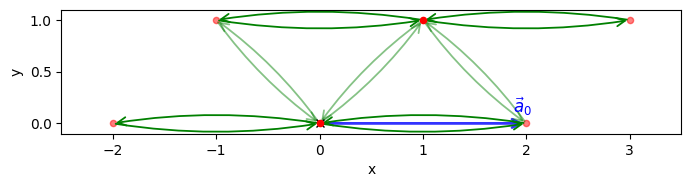

In [2]:
# define lattice vectors
lat_vecs = [[2, 0], [0, 1]]
# define coordinates of orbitals
orb_vecs = [[0, 0], [1 / 2, 1]]

lat = Lattice(lat_vecs, orb_vecs, periodic_dirs=[0])

# make one dimensional tight-binding model of a trestle-like structure
my_model = TBModel(lat)

# set model parameters
t_first = 0.8 + 0.6j
t_second = 2

# leave on-site energies to default zero values
# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j, [lattice vector to cell containing j])
my_model.set_hop(t_second, 0, 0, [1, 0])
my_model.set_hop(t_second, 1, 1, [1, 0])
my_model.set_hop(t_first, 0, 1, [0, 0])
my_model.set_hop(t_first, 1, 0, [1, 0])

print(my_model)
my_model.visualize()

In [3]:
# generate list of k-points following some high-symmetry line in
(k_vec, k_dist, k_node) = my_model.k_path("fullc", 100)
k_label = [r"$-\pi$", r"$0$", r"$\pi$"]

In [4]:
evals = my_model.solve_ham(k_vec)

Text(0, 0.5, 'Band energy')

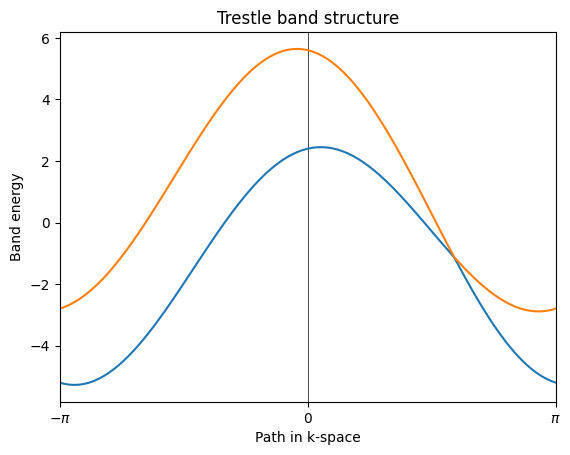

In [5]:
# First make a figure object
fig, ax = plt.subplots()
# specify horizontal axis details
ax.set_xlim(k_node[0], k_node[-1])
ax.set_xticks(k_node)
ax.set_xticklabels(k_label)
ax.axvline(x=k_node[1], linewidth=0.5, color="k")

# plot bands together
ax.plot(k_dist, evals)

# set titles
ax.set_title("Trestle band structure")
ax.set_xlabel("Path in k-space")
ax.set_ylabel("Band energy")